In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Importing Basic Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')

# Data Acquisition

In [5]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# PCA

PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). 

## Scaling

In [7]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
df2 = df.iloc[:,1:]

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()#instantiate
scaler.fit(df2)
df_scaled = scaler.transform(df2)
df_scaled

array([[ 1.75788035,  0.75744723, -0.69521045, ..., -1.81071884,
         0.13891975, -0.24102756],
       [ 1.75788035, -0.66165665, -0.61879381, ...,  0.83774863,
        -0.68965812, -0.23087859],
       [ 1.75788035, -0.66165665, -0.71219192, ...,  0.83774863,
        -0.68965812, -0.16301816],
       ...,
       [-1.61808342, -0.18862202, -0.2218518 , ..., -1.56994907,
        -0.08705603, -0.12861489],
       [-1.61808342, -2.08076053,  0.28759248, ...,  0.83774863,
        -0.68965812, -0.19742142],
       [-1.61808342, -0.18862202, -0.82681689, ..., -0.92789635,
         0.41511238, -0.18021979]])

## Apply PCA

In [9]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

.95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [10]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
df_scaled_pca = pca.transform(df_scaled)

In [12]:
# You can find out how many components PCA choose after fitting the model using pca.n_components_ . 
# In this case, 95% of the variance amounts to 330 principal components.
pca.n_components_

38

In [13]:
# variance by each component
pca.explained_variance_.round(2)

array([4.88, 4.13, 3.61, 3.  , 2.81, 2.59, 2.54, 2.29, 2.13, 2.08, 2.  ,
       1.89, 1.66, 1.39, 1.37, 1.24, 1.23, 1.21, 1.19, 1.17, 1.13, 1.09,
       1.05, 0.98, 0.91, 0.87, 0.81, 0.72, 0.68, 0.66, 0.61, 0.57, 0.56,
       0.53, 0.47, 0.46, 0.44, 0.41])

In [14]:
# explained variance ratio in terms of percentage of each PC component
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var*100, decimals=1)
exp_var

array([8.1, 6.9, 6. , 5. , 4.7, 4.3, 4.2, 3.8, 3.5, 3.5, 3.3, 3.1, 2.8,
       2.3, 2.3, 2.1, 2. , 2. , 2. , 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4,
       1.4, 1.2, 1.1, 1.1, 1. , 1. , 0.9, 0.9, 0.8, 0.8, 0.7, 0.7])

In [15]:
# Cumulative explained variance ratio

# if i want to capture 80 percent variance i use this
np.cumsum(exp_var)

array([ 8.1, 15. , 21. , 26. , 30.7, 35. , 39.2, 43. , 46.5, 50. , 53.3,
       56.4, 59.2, 61.5, 63.8, 65.9, 67.9, 69.9, 71.9, 73.9, 75.8, 77.6,
       79.3, 80.9, 82.4, 83.8, 85.2, 86.4, 87.5, 88.6, 89.6, 90.6, 91.5,
       92.4, 93.2, 94. , 94.7, 95.4])

In [16]:
labels = ['PC' + str(x) for x in range(1, len(exp_var)+1)]

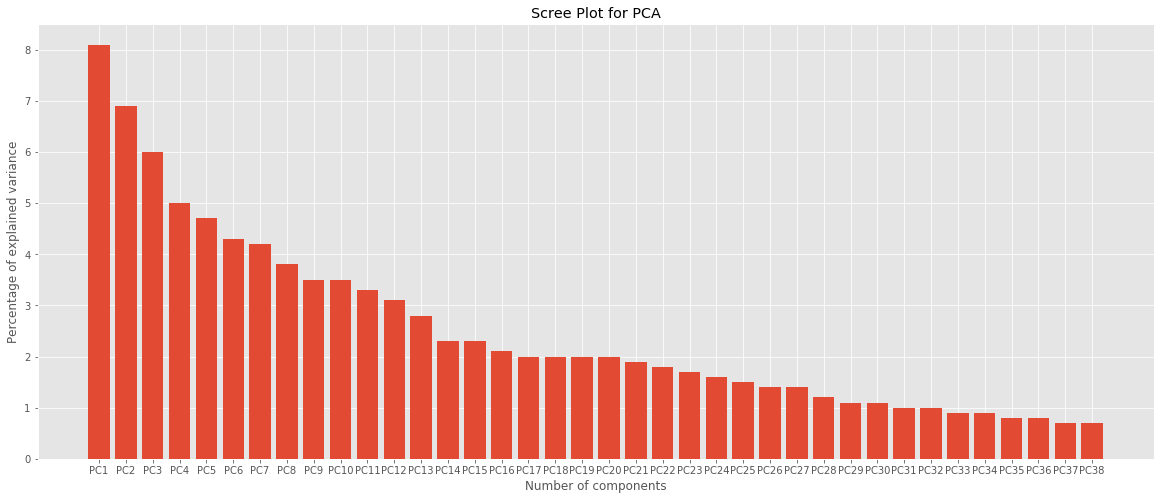

In [17]:
plt.figure(figsize=(20,8))
s = plt.bar(x = range(1, len(exp_var)+1), height = exp_var, tick_label = labels)
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")
plt.title("Scree Plot for PCA")
plt.show()

In [18]:
# pca
df_scaled_pca

array([[-1.34648179, -1.92109268, -1.96165114, ..., -0.05711869,
         0.18727658, -0.80930013],
       [ 0.21200733, -4.32405381, -1.08692318, ...,  0.86675434,
         0.01389532, -0.41399143],
       [-3.71738   , -3.53324826, -1.70058596, ..., -0.57026173,
        -0.69138673, -0.68377003],
       ...,
       [ 0.47004952,  2.63954765,  0.0234722 , ..., -0.89567761,
        -0.57005601,  1.0408702 ],
       [ 3.58087321,  0.20797442, -3.17201431, ..., -0.23334651,
         0.10592143,  1.21826544],
       [ 0.7852592 ,  0.62248651,  2.27154452, ..., -0.67127838,
        -0.45231596,  1.14452101]])

# Clustering

## Partitioning Clustering - KMeans

### Finding the right number of clusters

In [19]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(df_scaled_pca)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]

,num_clusters,cluster_wss
0,1,2.273929e+06
1,2,2.142218e+06
2,3,2.037681e+06
3,4,1.937322e+06
4,5,1.820989e+06
5,6,1.759504e+06
6,7,1.676819e+06
7,8,1.629837e+06
8,9,1.575500e+06


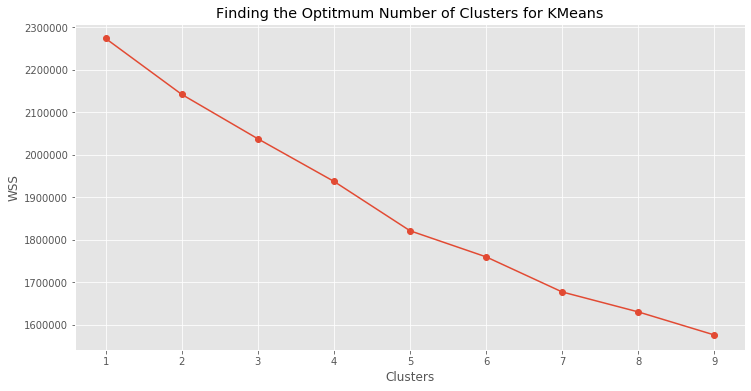

In [20]:
plt.figure(figsize=(12,6))
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.title('Finding the Optitmum Number of Clusters for KMeans')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))  # on x-axis, tick marks after interval of 1
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

### Building Cluster model

In [21]:
# kcluster=KMeans(n_clusters=5, random_state=0)
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=0)
k_means.fit(df_scaled_pca)
labels = k_means.labels_
print(labels)

[0 2 3 ... 0 1 0]


### Adding CLuster Labels o the dataset

In [22]:
df2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [23]:
df2["Clus_km"] = labels
df2.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3


## Cluster Profiling

In [24]:
df_0 = df2[df2['Clus_km']==0]
df_0.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.6,-0.200000,0.500000,-0.1875,0.000000,0.1875,593,0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.6,-0.166667,0.000000,0.0000,0.500000,0.0000,1200,0
13,731.0,9.0,285.0,0.744186,1.0,0.841530,4.0,2.0,0.0,21.0,4.343860,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,22800.0,11785.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033386,0.033427,0.033352,0.866499,0.033337,0.509744,-0.053085,0.028070,0.052632,0.347826,0.652174,0.457500,0.160000,1.00,-0.337889,-0.7,-0.100000,1.000000,-1.0000,0.500000,1.0000,10000,0
16,731.0,8.0,1118.0,0.512397,1.0,0.709770,26.0,18.0,12.0,1.0,4.703936,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,555.0,14000.0,3904.625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040081,0.040144,0.040028,0.839742,0.040006,0.579630,0.056379,0.041145,0.025939,0.613333,0.386667,0.504529,0.100000,1.00,-0.401437,-1.0,-0.050000,0.566667,-0.1000,0.066667,0.1000,13600,0
47,731.0,12.0,161.0,0.668831,1.0,0.752381,5.0,4.0,0.0,6.0,4.453416,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,638.0,29200.0,8260.750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125775,0.020304,0.020007,0.813909,0.020005,0.572383,0.166185,0.049689,0.018634,0.727273,0.272727,0.427462,0.100000,0.85,-0.363889,-0.8,-0.125000,0.583333,0.2500,0.083333,0.2500,1200,0


In [25]:
df_1 = df2[df2['Clus_km']==1]
df_1.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
9,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,5.090909,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040000,0.839997,0.040001,0.040002,0.313889,0.051852,0.038961,0.030303,0.562500,0.437500,0.298413,0.100000,0.50,-0.238095,-0.500000,-0.10,0.00,0.00,0.50,0.00,710,1
10,731.0,9.0,1248.0,0.490050,1.0,0.731638,11.0,0.0,1.0,0.0,4.617788,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025004,0.287301,0.400829,0.261864,0.025002,0.482060,0.102350,0.038462,0.020833,0.648649,0.351351,0.404480,0.100000,1.00,-0.415064,-1.000000,-0.10,0.00,0.00,0.50,0.00,2200,1
14,731.0,8.0,259.0,0.562753,1.0,0.644444,19.0,3.0,9.0,0.0,5.023166,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4800.0,4800.0,4800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028780,0.028814,0.028574,0.885144,0.028687,0.295175,0.057299,0.015444,0.011583,0.571429,0.428571,0.249091,0.136364,0.50,-0.138690,-0.187500,-0.05,0.75,0.55,0.25,0.55,761,1
15,731.0,12.0,682.0,0.459542,1.0,0.634961,10.0,0.0,1.0,0.0,4.620235,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033334,0.033334,0.866663,0.033335,0.033335,0.473285,0.062227,0.049853,0.039589,0.557377,0.442623,0.343070,0.050000,0.60,-0.220150,-0.600000,-0.05,0.75,-0.25,0.25,0.25,1600,1
21,731.0,9.0,391.0,0.510256,1.0,0.650000,9.0,2.0,1.0,1.0,5.296675,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,704.0,704.0,704.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028774,0.028577,0.680662,0.028574,0.233412,0.284211,0.033333,0.017903,0.005115,0.777778,0.222222,0.150000,0.050000,0.35,-0.108333,-0.166667,-0.05,0.00,0.00,0.50,0.00,598,1


In [26]:
df_2 = df2[df2['Clus_km']==2]
df_2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.700000,-0.118750,-0.125,-0.100,0.0,0.0,0.5,0.0,711,2
17,731.0,8.0,397.0,0.624679,1.0,0.805668,11.0,0.0,1.0,0.0,5.445844,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866666,0.033333,0.033334,0.033333,0.033333,0.374314,0.212488,0.065491,0.010076,0.866667,0.133333,0.381847,0.033333,1.000000,-0.144643,-0.200,-0.100,0.0,0.0,0.5,0.0,3100,2
24,731.0,13.0,244.0,0.560000,1.0,0.680272,3.0,2.0,1.0,0.0,4.422131,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2800.0,2800.0,2800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300294,0.050001,0.050001,0.050000,0.549704,0.331640,-0.092305,0.016393,0.024590,0.400000,0.600000,0.292424,0.136364,0.433333,-0.456481,-1.000,-0.125,0.7,-0.4,0.2,0.4,852,2
29,731.0,11.0,723.0,0.490934,1.0,0.642241,18.0,1.0,1.0,0.0,5.228216,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866657,0.033337,0.033335,0.033336,0.033335,0.375049,0.182696,0.063624,0.008299,0.884615,0.115385,0.340572,0.033333,1.000000,-0.213889,-0.600,-0.100,0.5,0.5,0.0,0.5,425,2
30,731.0,8.0,708.0,0.482219,1.0,0.688119,8.0,3.0,1.0,1.0,4.620056,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6100.0,6100.0,6100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744049,0.169324,0.028572,0.029484,0.028572,0.491428,0.138939,0.055085,0.015537,0.780000,0.220000,0.291941,0.100000,1.000000,-0.244444,-0.500,-0.050,0.0,0.0,0.5,0.0,3200,2


In [27]:
df_3 = df2[df2['Clus_km']==3]
df_3.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.8,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.5,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3
5,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.4,-0.100000,0.642857,0.214286,0.142857,0.214286,855,3
6,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.0,-0.224479,-0.5,-0.050000,0.000000,0.000000,0.500000,0.000000,556,3
7,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022224,0.150733,0.243435,0.022224,0.561384,0.543474,0.298613,0.083923,0.015167,0.846939,0.153061,0.427720,0.100000,1.0,-0.242778,-0.5,-0.050000,1.000000,0.500000,0.500000,0.500000,891,3


In [28]:
df_4 = df2[df2['Clus_km']==4]
df_4.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
31037,142.0,9.0,1570.0,701.0,1042.0,650.0,11.0,10.0,51.0,0.0,4.696178,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,778.0,143.714286,23100.0,843300.0,330442.857143,2420.579189,3490.598812,2912.105124,795.0,0.0,6924.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900,4


### Cluster 0

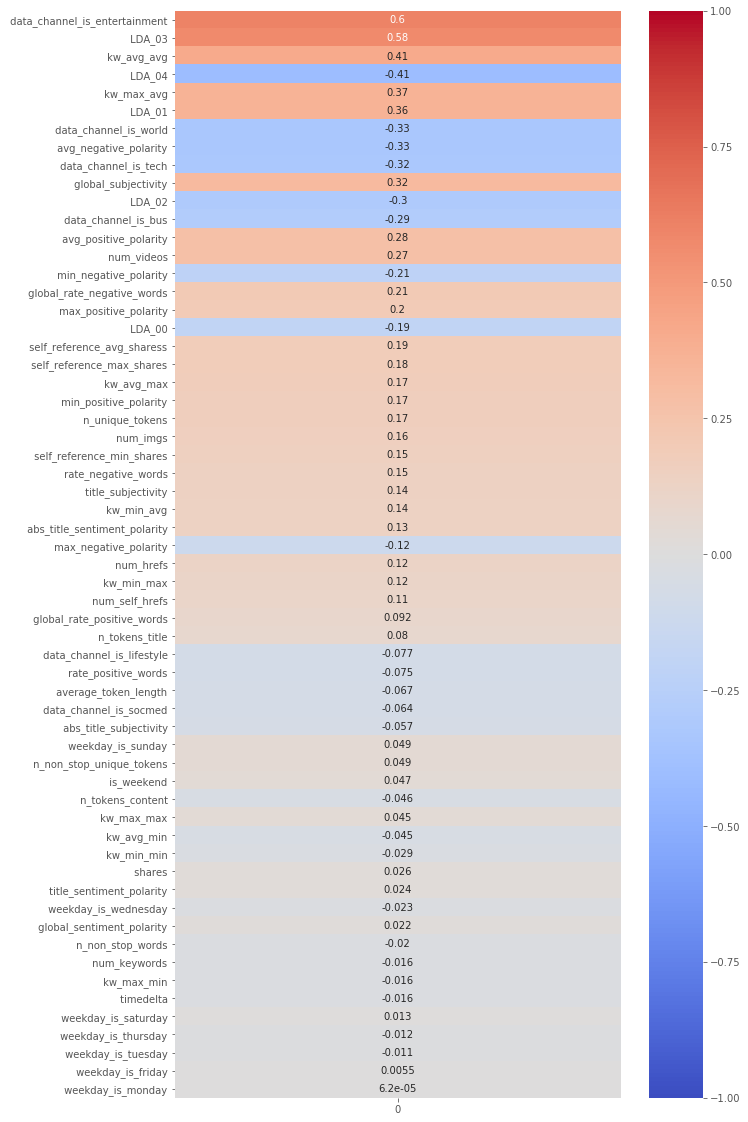

In [30]:
correlations = df2.corrwith(df2['Clus_km']==0, method='spearman').iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()    # return absolute value of a number
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [30]:
# entertainment data channel, LDA_03

### Cluster 1

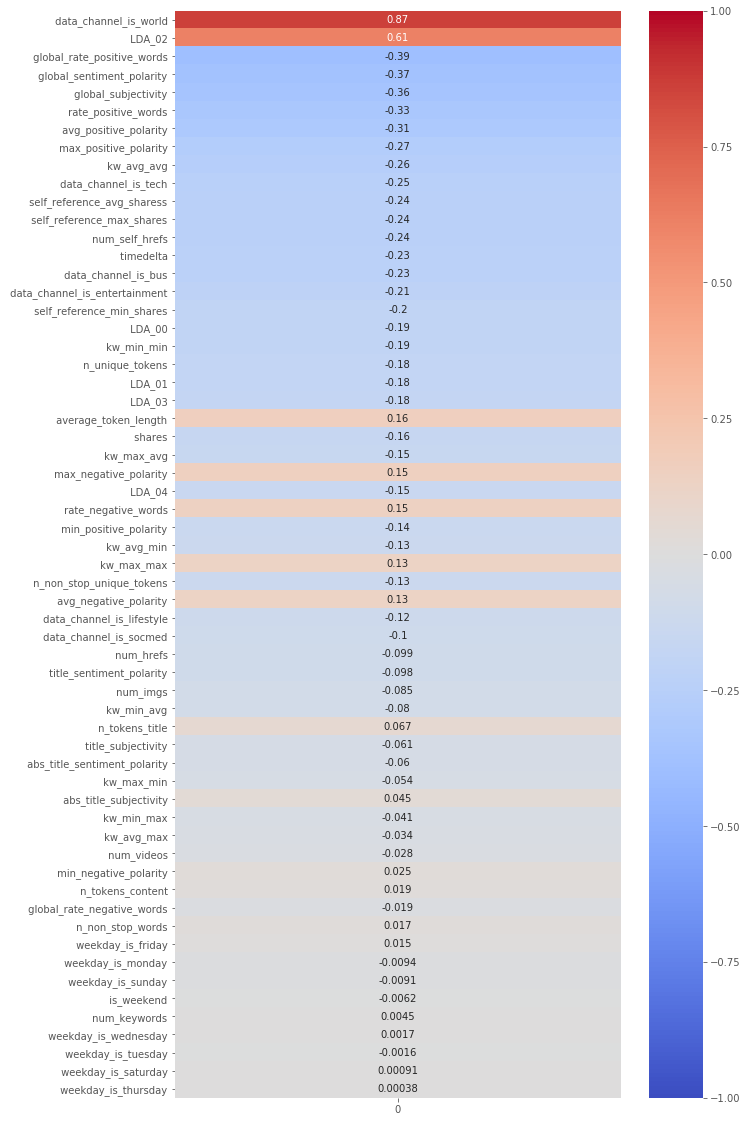

In [31]:
correlations = df2.corrwith(df2['Clus_km']==1, method='spearman').iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()    # return absolute value of a number
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [32]:
# world data channel, LDA_02

### Cluster 2

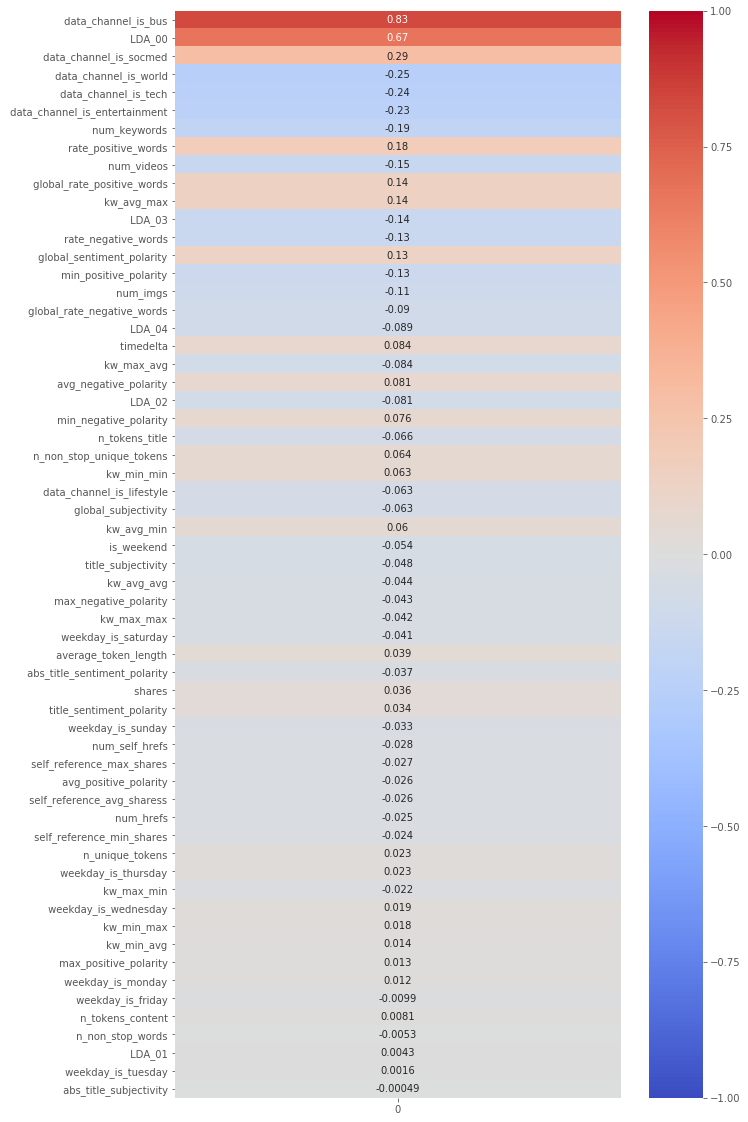

In [33]:
correlations = df2.corrwith(df2['Clus_km']==2, method='spearman').iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()    # return absolute value of a number
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [34]:
# Business data channel, LDA_00

### Cluster 3

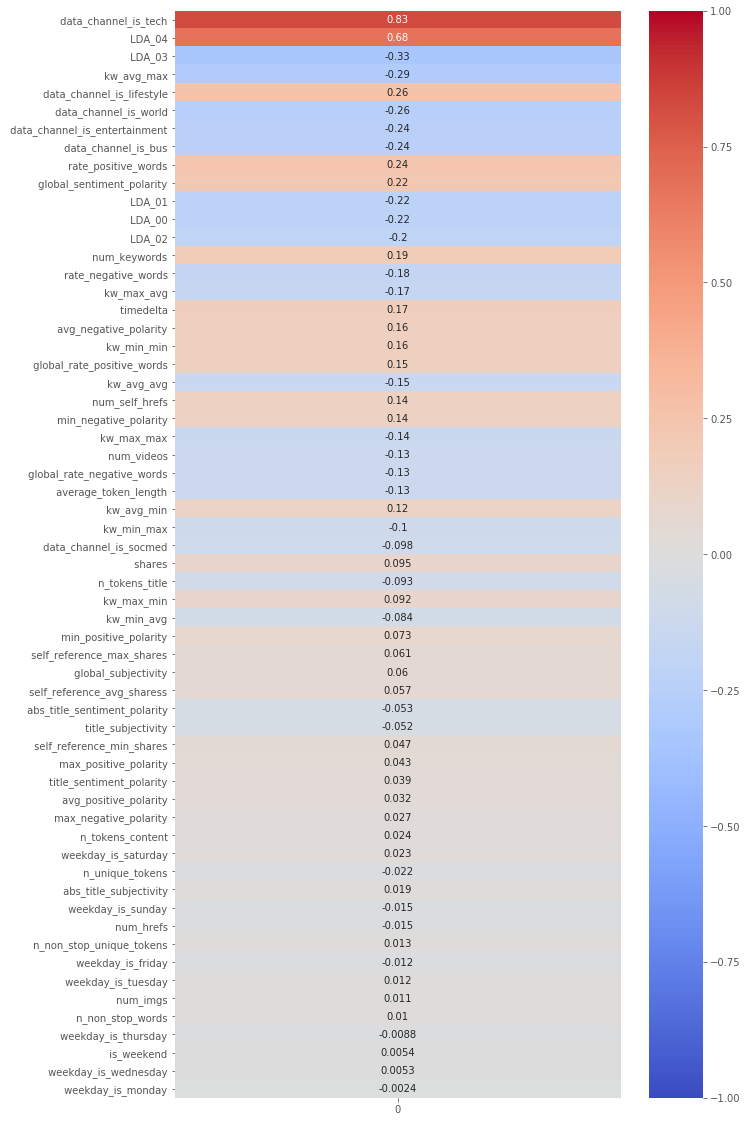

In [35]:
correlations = df2.corrwith(df2['Clus_km']==3, method='spearman').iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()    # return absolute value of a number
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [36]:
# tech data channel, LDA_02

### Cluster 4

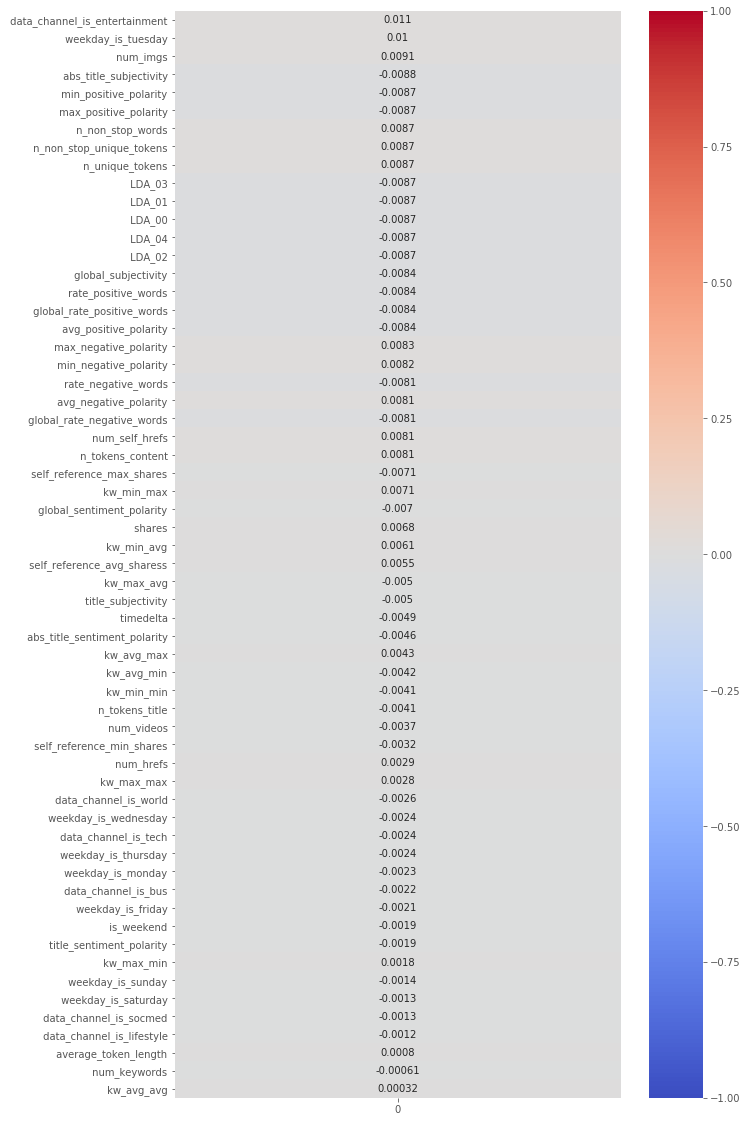

In [37]:
correlations = df2.corrwith(df2['Clus_km']==4, method='spearman').iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()    # return absolute value of a number
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [38]:
# Miniscule relation with entertainment, which can be ignored
# Only one row which belongs to CLuster 4, which belongs to no LDA, data channel.